In [2]:
from sklearn.datasets import make_blobs
from keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense
from matplotlib import pyplot

In [18]:
# data load

num_samples=1000

X, y = make_blobs(n_samples=num_samples, centers=3, n_features=2, cluster_std=2, random_state=2)
y =to_categorical(y)

print(X.shape, y.shape)

(1000, 2) (1000, 3)


In [19]:
# data split 8:2

train_rate = 0.8

X_train, X_test = X[:int(num_samples*train_rate), :], X[int(num_samples*train_rate):, :]
y_train ,y_test = y[:int(num_samples*train_rate)], y[int(num_samples*train_rate):]

print("Train Shape : ", X_train.shape, y_train.shape)
print("Test Shape : ", X_test.shape, y_test.shape)

Train Shape :  (800, 2) (800, 3)
Test Shape :  (200, 2) (200, 3)


In [20]:
model = Sequential()
model.add(Dense(25, input_dim=2, activation='relu'))
model.add(Dense(3, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 25)                75        
                                                                 
 dense_1 (Dense)             (None, 3)                 78        
                                                                 
Total params: 153
Trainable params: 153
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=1000, verbose=1)

Epoch 1/1000
25/25 [==============================] - 1s 10ms/step - loss: 1.2809 - accuracy: 0.2600 - val_loss: 1.0711 - val_accuracy: 0.3950
Epoch 2/1000
25/25 [==============================] - 0s 2ms/step - loss: 1.0288 - accuracy: 0.3700 - val_loss: 0.9393 - val_accuracy: 0.4350
Epoch 3/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.9219 - accuracy: 0.4313 - val_loss: 0.8515 - val_accuracy: 0.5450
Epoch 4/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.8468 - accuracy: 0.5512 - val_loss: 0.7774 - val_accuracy: 0.6050
Epoch 5/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7888 - accuracy: 0.6100 - val_loss: 0.7247 - val_accuracy: 0.6850
Epoch 6/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7442 - accuracy: 0.6562 - val_loss: 0.6834 - val_accuracy: 0.7200
Epoch 7/1000
25/25 [==============================] - 0s 2ms/step - loss: 0.7092 - accuracy: 0.6725 - val_loss: 0.6485 - val_accuracy: 0.7450
Epoch

In [25]:
_, train_acc = model.evaluate(X_train, y_train)
_, test_acc = model.evaluate(X_test, y_test)

7/7 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.8400


In [26]:
print("Train : %.3f, Test : %.3f"%(train_acc, test_acc))

Train : 0.830, Test : 0.840


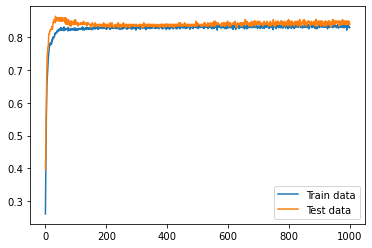

In [27]:
pyplot.plot(history.history['accuracy'], label='Train data')
pyplot.plot(history.history['val_accuracy'], label='Test data')
pyplot.legend()
pyplot.show()